In [1]:
#Imports
import pandas as pd
import numpy as np
import statsmodels.api as sm

from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase

In [2]:
#Load data

#Juvenile residential placement rates
juvenile_placement = pd.read_csv('../Data/National data by state/Juvenile Residential Placement Rates.csv')

# Preprocessing

In [3]:
juvenile_placement.head(30)

,Location,TimeFrame,DataFormat,Data
0,United States,1997,Number,105055
1,United States,1999,"Rate per 100,000",355
2,United States,1997,"Rate per 100,000",356
3,United States,1999,Number,107493
4,United States,2001,Number,104219
5,United States,2001,"Rate per 100,000",334
6,United States,2003,"Rate per 100,000",303
7,United States,2003,Number,96531
8,United States,2006,Number,92721
9,United States,2006,"Rate per 100,000",289


In [4]:
#Remove United States
juvenile_placement = juvenile_placement[juvenile_placement['Location']!='United States']

In [5]:
#Remove DataFormat= Number. we want the rates only
juvenile_placement = juvenile_placement[juvenile_placement['DataFormat']!='Number']

In [6]:
juvenile_placement.head()

,Location,TimeFrame,DataFormat,Data
21,Alabama,2011,"Rate per 100,000",198
22,Alabama,2015,"Rate per 100,000",168
25,Alabama,2010,"Rate per 100,000",212
26,Alabama,2013,"Rate per 100,000",184
29,Alabama,2006,"Rate per 100,000",333


In [7]:
#Missing values
juvenile_placement.isna().sum()

Location      0
TimeFrame     0
DataFormat    0
Data          0
dtype: int64

In [8]:
#Time period covered
juvenile_placement['TimeFrame'].unique()

array([2011, 2015, 2010, 2013, 2006, 2007, 2003, 2001, 1999, 1997],
      dtype=int64)

In [9]:
#Descriptive statistics for placement rates
juvenile_placement.describe()['Data']

count    510.000000
mean     253.743137
std      115.434409
min       38.000000
25%      173.000000
50%      239.500000
75%      320.000000
max      701.000000
Name: Data, dtype: float64

# Exploratory Data Analysis

In [10]:
#Average placement rate by state
avg_placement = juvenile_placement.groupby('Location').mean()
avg_placement.drop(['TimeFrame'],axis=1,inplace=True)

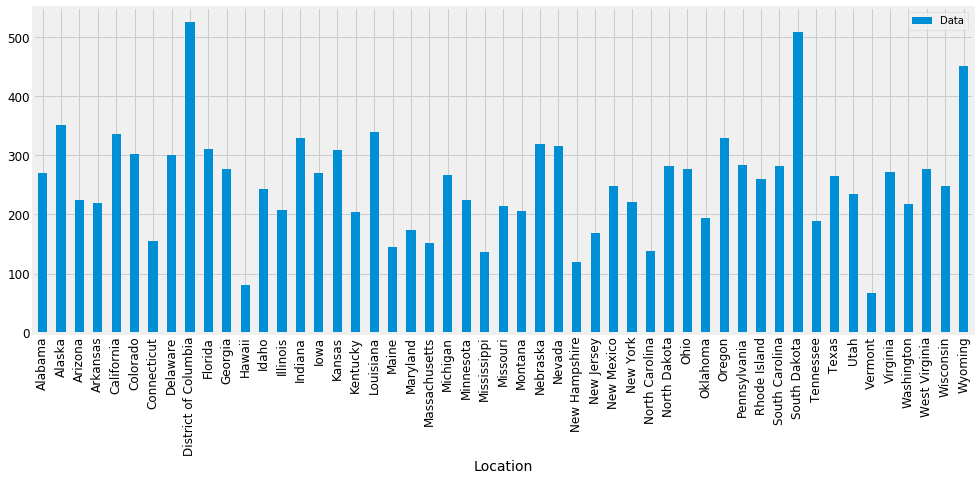

In [11]:
#Bar plot of average juvenile placement rate by state
avg_placement.plot(figsize=(15, 6),kind='bar')
plt.show()

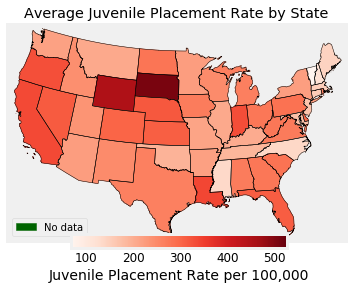

In [12]:
#Basemap heatmap of placement rate bar chart


# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
ax = plt.gca() 
fig = plt.gcf()

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('../Data/US-Educational-Finances/st99_d00','states',drawbounds=True)
# Juvenile placement by state - to dictionary
state_placement = avg_placement.to_dict()['Data']

nodata_color = "darkgreen"
colors={}
statenames=[]
patches = []

cmap = plt.cm.Reds
vmin = min(state_placement.values()); vmax = max(state_placement.values())
norm = Normalize(vmin=vmin, vmax=vmax)
# color mapper to covert values to colors
mapper = ScalarMappable(norm=norm, cmap=cmap)

for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename in state_placement:
        exp = state_placement[statename]
        colors[statename] = mapper.to_rgba(exp)
        statenames.append(statename)
    else:
        statenames.append(statename)
        colors[statename] = nodata_color

for nshape,seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]]) 
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    if (colors[statenames[nshape]] == nodata_color):
        p_no = poly
    ax.add_patch(poly)
plt.title('Average Juvenile Placement Rate by State')

# put legend for no data states
if p_no is not None:
    plt.legend((p_no,), ('No data',))

# construct custom colorbar
cax = fig.add_axes([0.27, 0.1, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Juvenile Placement Rate per 100,000')
plt.show()


In [13]:
#pivot
jp_pivot= juvenile_placement.pivot(index='TimeFrame',columns='Location',values='Data')
jp_pivot.head()

Location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
TimeFrame,,,,,,,,,,,,,,,,,,,,,
1997,328,418,351,192,524,356,260,380,578,386,...,533,347,315,239,68,389,332,198,357,502
1999,311,431,330,225,483,367,280,406,567,417,...,617,247,353,309,92,401,304,201,339,475
2001,313,385,306,208,436,348,213,341,353,392,...,514,259,365,319,86,351,292,253,339,523
2003,346,371,292,216,387,342,206,360,572,456,...,556,219,319,301,70,288,232,268,268,595
2006,333,412,249,257,345,389,166,317,701,386,...,660,210,329,263,78,275,203,316,242,545


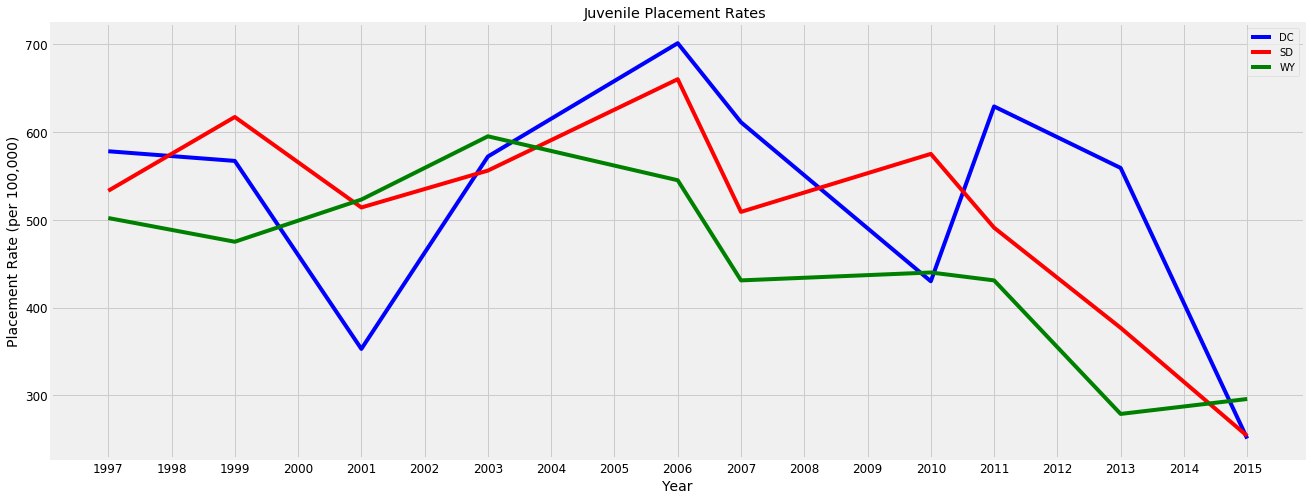

In [14]:
#DC, South Dakota,Wyoming

plt.figure(figsize=(20, 8))
plt.plot(jp_pivot.index, jp_pivot['District of Columbia'], 'b-', label = 'DC')
plt.plot(jp_pivot.index, jp_pivot['South Dakota'], 'r-', label = 'SD')
plt.plot(jp_pivot.index, jp_pivot['Wyoming'], 'g-', label = 'WY')
plt.xticks(np.arange(min(jp_pivot.index), max(jp_pivot.index)+1, 1.0))
plt.xlabel('Year')
plt.ylabel('Placement Rate (per 100,000)')
plt.title('Juvenile Placement Rates ')
plt.legend()


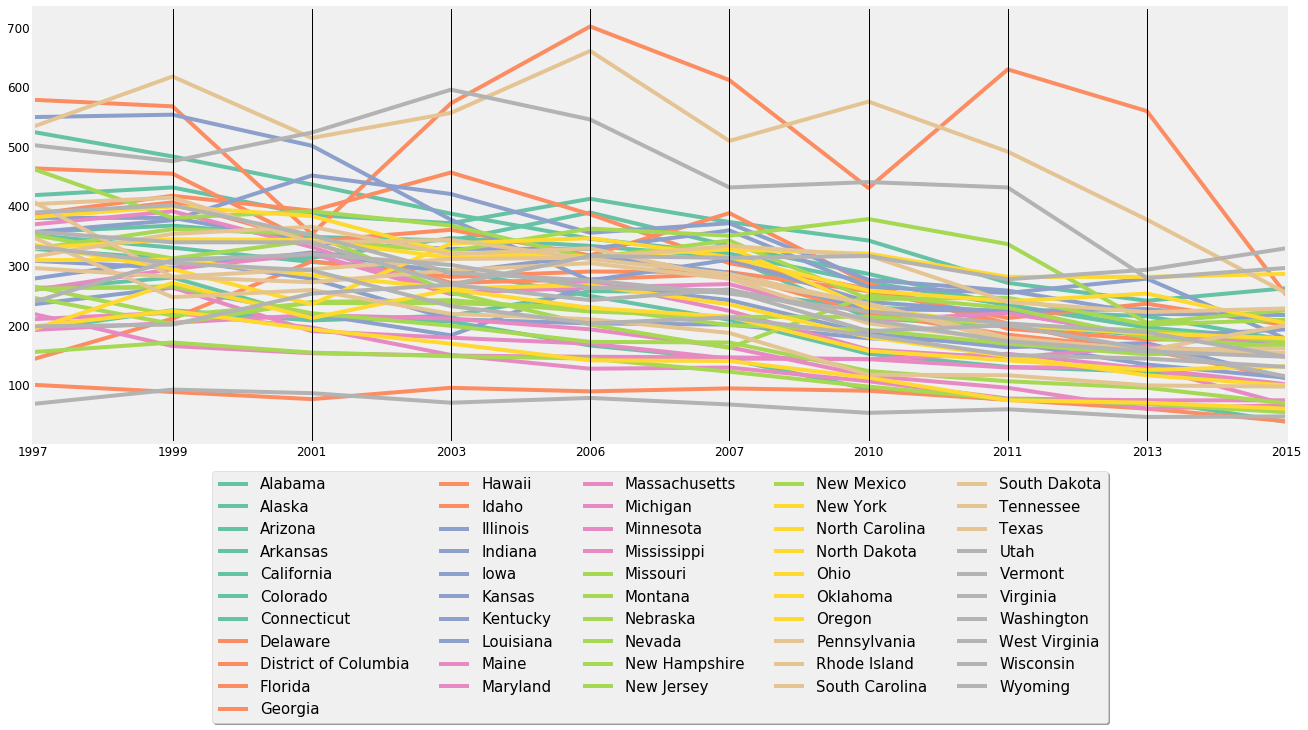

In [15]:
#pivot
jp_pivot1= juvenile_placement.pivot(index='Location',columns='TimeFrame',values='Data').reset_index()

# Make the parallel coordinates plot
plt.figure(figsize=(20, 8))
parallel_coordinates(jp_pivot1, 'Location', colormap=plt.get_cmap("Set2"))

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5,prop={'size': 15})

plt.show()

# School Funding data
***
#### EDA for state funding has been conducted in another notebook.

In [16]:
states = pd.read_csv(r"..\Data\US-Educational-Finances\states.csv")
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [17]:
#Missing values
states.isna().sum()

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

In [18]:
#Time covered in funding data
states['YEAR'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016], dtype=int64)

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


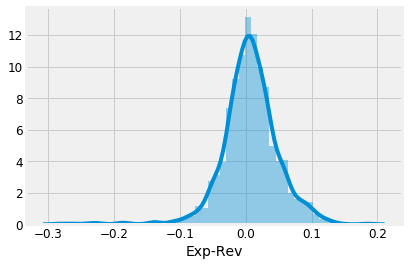

In [19]:
#gap metric normalized
states["Exp-Rev"] = (states["TOTAL_EXPENDITURE"] - states["TOTAL_REVENUE"])/states["TOTAL_REVENUE"]
sns.distplot(states["Exp-Rev"])
plt.show()

In [20]:
#Revenues and expenditures on a per student basis. Not dividing revenue gap by number of students

std_states = states.copy()
std_states[std_states.columns[3:-2]] = std_states[std_states.columns[3:-2]].div(std_states['ENROLL'].values,axis=0)
std_states.tail(5)

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,Exp-Rev
1270,Virginia,2016,1283493.0,12.667988,0.824427,4.906600,6.936961,12.853611,6.968962,4.023940,0.501371,1161323,0.014653
1271,Washington,2016,1083973.0,13.805108,1.012649,8.497630,4.294829,14.071657,6.538322,4.524628,0.532860,2204059,0.019308
1272,West Virginia,2016,276764.0,12.254408,1.293767,6.731591,4.229051,12.164031,6.519038,4.072983,0.854472,181392,-0.007375
1273,Wisconsin,2016,857736.0,13.637606,0.912414,6.979727,5.745466,13.742614,6.715840,4.303701,0.592272,1082849,0.007700
1274,Wyoming,2016,94511.0,21.634191,1.301563,12.441927,7.890701,21.523727,9.750124,6.197162,0.566812,454302,-0.005106


# Does school funding have an effect on juvenile placement rates?
***

In [21]:
#Get intersecting years present in both datasets
placement_years = list(juvenile_placement['TimeFrame'].unique())
funding_years = list(std_states['YEAR'].unique())
#intersection of both lists
years = list(set(placement_years) & set(funding_years))

In [22]:
#Filter out datasets where YEAR/TimeFrame is in the years list

placement_filt = juvenile_placement.copy()
placement_filt = placement_filt[placement_filt['TimeFrame'].isin(years)]
funding_filt = std_states.copy()
funding_filt = funding_filt[funding_filt['YEAR'].isin(years)]

In [23]:
funding_with_placement = pd.merge(funding_filt,placement_filt, left_on=['STATE','YEAR'],right_on=['Location','TimeFrame'],how='inner')


In [24]:
funding_with_placement.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,Exp-Rev,Location,TimeFrame,DataFormat,Data
0,Alabama,1997,737386.0,5.399869,0.510181,3.388791,1.500898,5.375236,2.842343,1.458330,0.439329,420070,-0.004562,Alabama,1997,"Rate per 100,000",328
1,Alaska,1997,128143.0,8.833491,1.135942,5.403058,2.294491,9.654082,5.087558,2.909156,0.319744,152330,0.092895,Alaska,1997,"Rate per 100,000",418
2,Arizona,1997,783552.0,5.543042,0.517248,2.434447,2.591347,5.656753,2.523827,1.598205,0.338437,678793,0.020514,Arizona,1997,"Rate per 100,000",351
3,Arkansas,1997,457349.0,5.151119,0.476960,3.032929,1.641230,5.202801,2.824379,1.459365,0.346206,192204,0.010033,Arkansas,1997,"Rate per 100,000",192
4,California,1997,5595836.0,6.364542,0.509444,3.674291,2.180807,6.051335,3.245348,1.794263,0.320413,3088674,-0.049211,California,1997,"Rate per 100,000",524


In [25]:
funding_with_placement.isna().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
Exp-Rev                         0
Location                        0
TimeFrame                       0
DataFormat                      0
Data                            0
dtype: int64

# Explore merged dataset
***

Text(0,0.5,'Placement Rate')

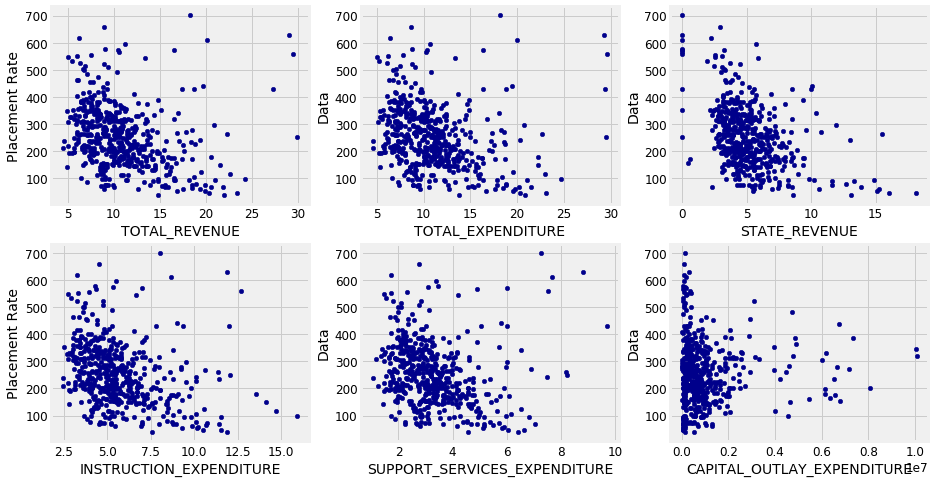

In [26]:
#Scatter plots of different features vs placement rate
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
for i,var in enumerate(['TOTAL_REVENUE','TOTAL_EXPENDITURE','STATE_REVENUE','INSTRUCTION_EXPENDITURE',
                        'SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']):
    if i in [0,1,2]:
        funding_with_placement.plot.scatter(x=var,y='Data',c='DarkBlue', ax=axes[0][i])
    else:
        funding_with_placement.plot.scatter(x=var,y='Data',c='DarkBlue', ax=axes[1][i-3])
axes[0][0].set_ylabel('Placement Rate')
axes[1][0].set_ylabel('Placement Rate')

In [27]:
#Function to plot fitted line on top of scatter plot

def plot_fitted_line(X,y,predictions):

    plt.scatter(X,y)
    plt.plot(X, predictions)
    return plt.show()

# Mixed Effect Linear Models
***

In [28]:
def RMSE(y,preds):
    return np.sqrt(((y-preds)**2).values.mean())

## Instruction Expenditure

In [29]:

cols_model = ['INSTRUCTION_EXPENDITURE']

X = funding_with_placement[cols_model]


y = funding_with_placement["Data"] #juvenile placement rate
groups = funding_with_placement["STATE"]
# Note the difference in argument order
model = sm.MixedLM(y, X, groups).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:                   MixedLM      Dependent Variable:      Data      
No. Observations:        510          Method:                  REML      
No. Groups:              51           Scale:                   3420.3847 
Min. group size:         10           Likelihood:              -2957.7109
Max. group size:         10           Converged:               Yes       
Mean group size:         10.0                                            
-------------------------------------------------------------------------
                          Coef.    Std.Err.    z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------------
INSTRUCTION_EXPENDITURE    -30.082    1.857 -16.203 0.000 -33.720 -26.443
Group Var               188449.054  695.435                              
=========================================================================

"""

In [30]:
RMSE(y,predictions)

437.9359507391658

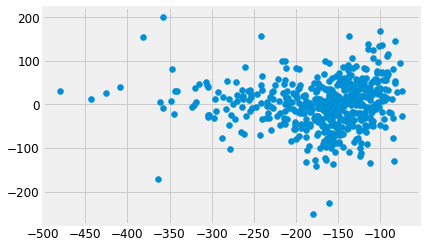

In [31]:
#Residual plot
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


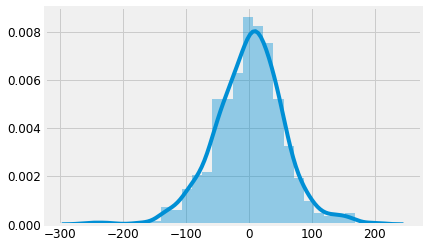

In [32]:
#Residual histogram
sns.distplot(model.resid)
plt.show()

## State Revenue

In [33]:
cols_model = ['STATE_REVENUE']

X = funding_with_placement[cols_model]
y = funding_with_placement["Data"] #juvenile placement rate
groups = funding_with_placement["STATE"]
# Note the difference in argument order
model = sm.MixedLM(y, X, groups).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:               MixedLM   Dependent Variable:   Data      
No. Observations:    510       Method:               REML      
No. Groups:          51        Scale:                4278.8559 
Min. group size:     10        Likelihood:           -3002.1512
Max. group size:     10        Converged:            Yes       
Mean group size:     10.0                                      
---------------------------------------------------------------
                Coef.    Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
STATE_REVENUE    -22.684    2.061 -11.006 0.000 -26.724 -18.645
Group Var     143850.809  479.562                              
===============================================================

"""

In [34]:
RMSE(y,predictions)

384.7336538434917

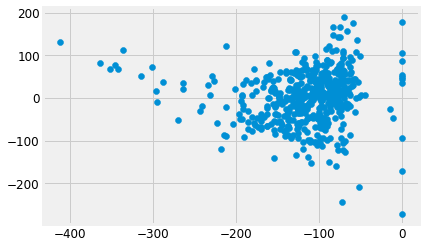

In [35]:
#Residual plot
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


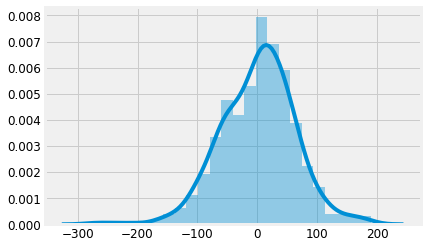

In [36]:
#Residual histogram
sns.distplot(model.resid)
plt.show()

# Compare to Linear Models
***

## Instruction Expenditure

In [37]:
#OLS linear model with a transformation

cols_model = ['INSTRUCTION_EXPENDITURE']

X = funding_with_placement[cols_model]
# X_const = sm.add_constant(X)

y = np.sqrt(funding_with_placement["Data"]) #juvenile placement rate

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Data   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1823.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          2.38e-170
Time:                        11:45:12   Log-Likelihood:                -1747.3
No. Observations:                 510   AIC:                             3497.
Df Residuals:                     509   BIC:                             3501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
INSTRUCTION_EXPENDITURE     2.3449      0.055     42.696      0.000       2.237       2.453
==============================================================================
Omnibus:                       68.126   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.091
Skew:                          -0.892   Prob(JB):                     1.12e-22
Kurtosis:                       4.255   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
RMSE(y,predictions)

7.442114955397667

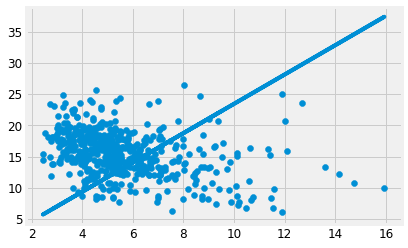

In [39]:
#Fitted line plot
plot_fitted_line(X,y,predictions)

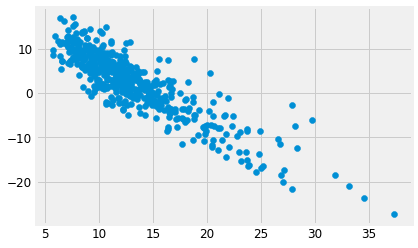

In [40]:
#Residual plot
plt.scatter(predictions, model.resid)
plt.show()

### Results indicate this is not a good model for Instruction Expenditure as a predictor

## State Revenue

In [41]:
##Robust linear model with a constant

cols_model = ['STATE_REVENUE']

X = funding_with_placement[cols_model]

X_const = sm.add_constant(X)

y = funding_with_placement["Data"] #juvenile placement rate

# Note the difference in argument order
model = sm.RLM(y, X_const, M=sm.robust.norms.HuberT()).fit()
predictions = model.predict(X_const) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   Data   No. Observations:                  510
Model:                            RLM   Df Residuals:                      508
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 28 Nov 2018                                         
Time:                        11:45:13                                         
No. Iterations:                    12                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           349.6248     10.819     32.315      0.000     328.419     370.830
STATE_REVENUE   -20.0190      1.915    -10.452      0.000     -23.773     -16.265
=================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [42]:
RMSE(y,predictions)

104.53188319973873

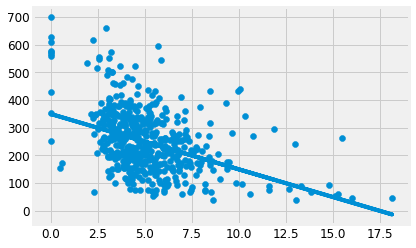

In [43]:
#Fitted line plot
plot_fitted_line(X,y,predictions)

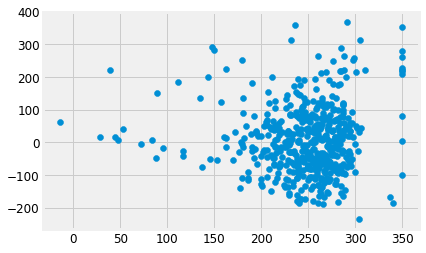

In [44]:
#Residual plot
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


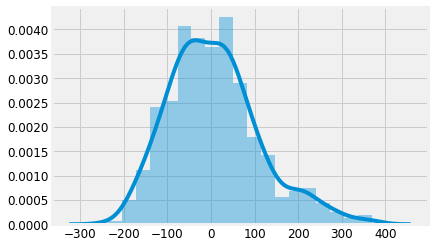

In [45]:
#Residual histogram
sns.distplot(model.resid)

In [46]:
##Robust linear model using a exponential transformation

cols_model = ['STATE_REVENUE']

X = funding_with_placement[cols_model]

X_const = sm.add_constant(X)

y = np.log(funding_with_placement["Data"]) #juvenile placement rate

# Note the difference in argument order
model = sm.RLM(y, X_const, M=sm.robust.norms.HuberT()).fit()
predictions = model.predict(X_const) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   Data   No. Observations:                  510
Model:                            RLM   Df Residuals:                      508
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 28 Nov 2018                                         
Time:                        11:45:14                                         
No. Iterations:                    16                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.0101      0.046    131.224      0.000       5.920       6.100
STATE_REVENUE    -0.1104      0.008    -13.621      0.000      -0.126      -0.095
=================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

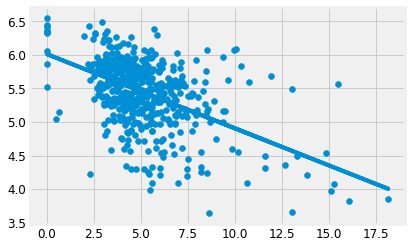

In [47]:
#Fitted line plot
plot_fitted_line(X,y,predictions)

In [48]:
RMSE(y,predictions)

0.44771701905607253

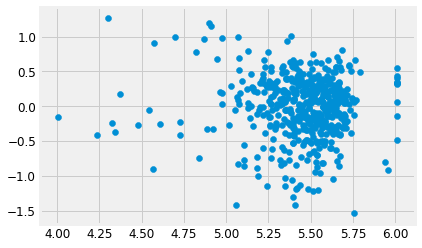

In [49]:
#Residual plot
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


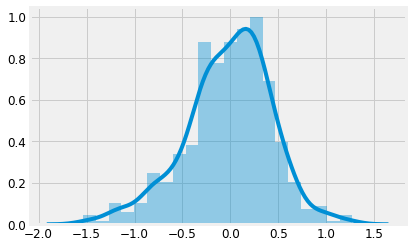

In [50]:
#Residual histogram
sns.distplot(model.resid)

# Does school performance significantly contribute to school funding?
***

##  School Performance data
***
#### EDA for state performance has been conducted in another notebook.

In [51]:
#Load NAEP data
NAEP = pd.read_csv(r"..\Data\US-Educational-Finances\naep.csv")
NAEP.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR
0,2017,Alabama,232.170687741509,Mathematics,4
1,2017,Alaska,230.456277558902,Mathematics,4
2,2017,Arizona,234.435788152091,Mathematics,4
3,2017,Arkansas,233.848143678937,Mathematics,4
4,2017,California,232.262940994562,Mathematics,4


In [52]:
NAEP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 5 columns):
YEAR            2305 non-null int64
STATE           2305 non-null object
AVG_SCORE       2305 non-null object
TEST_SUBJECT    2305 non-null object
TEST_YEAR       2305 non-null int64
dtypes: int64(2), object(3)
memory usage: 90.1+ KB


In [53]:
NAEP['AVG_SCORE']= pd.to_numeric(NAEP['AVG_SCORE'], errors= 'coerce')

In [54]:
#Missing values
NAEP.isna().sum()

YEAR              0
STATE             0
AVG_SCORE       130
TEST_SUBJECT      0
TEST_YEAR         0
dtype: int64

In [55]:
NAEP['TEST_SUBJECT'].unique()

array(['Mathematics', 'Reading'], dtype=object)

In [56]:
#Time covered in data
NAEP['YEAR'].unique()

array([2017, 2015, 2013, 2011, 2009, 2007, 2005, 2003, 2000, 1996, 1992,
       1990, 2002, 1998, 1994], dtype=int64)

In [57]:
#Return new table which averages the test score from test year
NAEP_by_subject = NAEP.groupby(['STATE','TEST_SUBJECT','YEAR']).mean().reset_index()

In [58]:
NAEP_by_subject.head()

,STATE,TEST_SUBJECT,YEAR,AVG_SCORE,TEST_YEAR
0,Alabama,Mathematics,1990,252.863660,8
1,Alabama,Mathematics,1992,230.257699,6
2,Alabama,Mathematics,1996,234.120918,6
3,Alabama,Mathematics,2000,240.049629,6
4,Alabama,Mathematics,2003,242.641832,6


In [59]:
#Pivot TEST_SUBJECT column
NAEP_pivot = NAEP_by_subject.pivot_table(index=['STATE','YEAR'], \
                columns='TEST_SUBJECT', values='AVG_SCORE').reset_index()
NAEP_pivot.head()

TEST_SUBJECT,STATE,YEAR,Mathematics,Reading
0,Alabama,1990,252.863660,NaN
1,Alabama,1992,230.257699,207.358492
2,Alabama,1994,NaN,207.963517
3,Alabama,1996,234.120918,NaN
4,Alabama,1998,NaN,233.073701


In [60]:
#Drop rows where there is at least one NAN
NAEP_pivot.dropna(thresh=1, inplace=True)

In [61]:
#Get intersecting years present in both funding_with_placement and NAEP_pivot
merged_years = list(funding_with_placement['YEAR'].unique())
NAEP_years = list(NAEP_pivot['YEAR'].unique())
#intersection of both lists
years = list(set(merged_years) & set(NAEP_years))

In [62]:
years

[2003, 2007, 2011, 2013, 2015]

In [63]:
#Filter out datasets where YEAR is in the years list

merged_filt = funding_with_placement.copy()
merged_filt = merged_filt[merged_filt['YEAR'].isin(years)]
NAEP_filt = NAEP_pivot.copy()
NAEP_filt = NAEP_filt[NAEP_filt['YEAR'].isin(years)]

In [64]:
funding_placement_naep = pd.merge(merged_filt,NAEP_filt, left_on=['STATE','YEAR'],right_on=['STATE','YEAR'],how='inner')


In [65]:
funding_placement_naep.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,Exp-Rev,Location,TimeFrame,DataFormat,Data,Mathematics,Reading
0,Alabama,2003,727900.0,7.138417,0.779920,4.076083,2.282414,7.279753,3.870190,2.090207,0.583407,432279,0.019799,Alabama,2003,"Rate per 100,000",346,242.641832,230.128221
1,Alaska,2003,133303.0,10.697044,1.946115,6.101671,2.649258,12.079916,5.727741,3.856267,0.417958,247005,0.129276,Alaska,2003,"Rate per 100,000",371,256.008362,233.978389
2,Arizona,2003,875111.0,7.461789,0.846269,3.328297,3.287224,7.096571,3.212058,2.244548,0.347298,864642,-0.048945,Arizona,2003,"Rate per 100,000",292,250.044373,232.096458
3,Arkansas,2003,450158.0,7.200305,0.844030,5.318879,1.037396,7.203691,3.929094,2.160570,0.379349,247245,0.000470,Arkansas,2003,"Rate per 100,000",216,247.389089,235.806697
4,California,2003,6226552.0,9.606578,0.930797,5.399098,3.276683,9.595983,4.747662,2.735115,0.481128,7341541,-0.001103,California,2003,"Rate per 100,000",387,247.252241,228.319969


In [66]:
funding_placement_naep.isna().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
Exp-Rev                         0
Location                        0
TimeFrame                       0
DataFormat                      0
Data                            0
Mathematics                     0
Reading                         0
dtype: int64

# Explore merged dataset
***

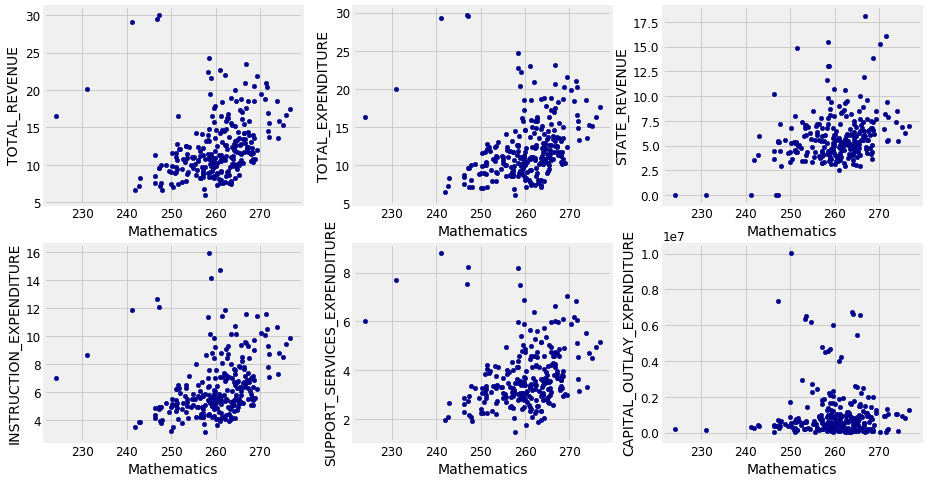

In [67]:
#Scatter plots of different features vs Mathematics score
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
for i,var in enumerate(['TOTAL_REVENUE','TOTAL_EXPENDITURE','STATE_REVENUE','INSTRUCTION_EXPENDITURE',
                        'SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']):
    if i in [0,1,2]:
         funding_placement_naep.plot.scatter(x='Mathematics',y=var,c='DarkBlue', ax=axes[0][i])
    else:
         funding_placement_naep.plot.scatter(x='Mathematics',y=var,c='DarkBlue', ax=axes[1][i-3])


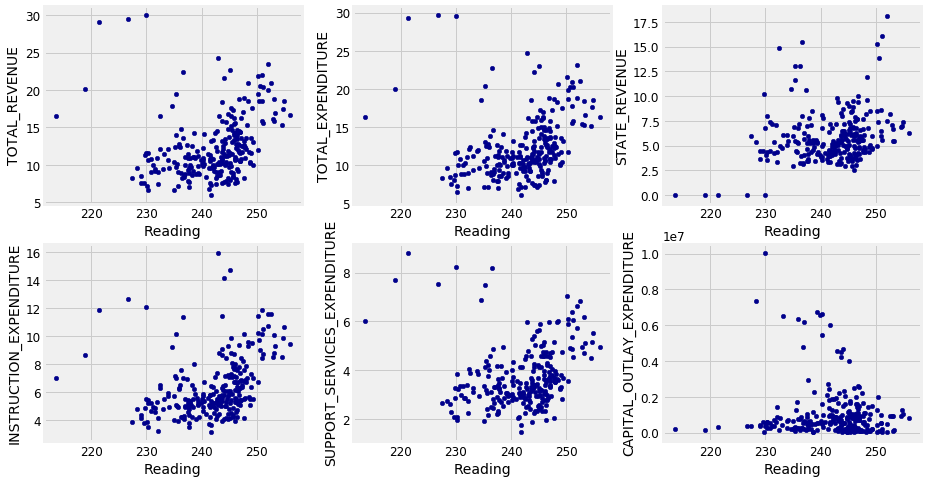

In [68]:

##Scatter plots of different features vs Reading score
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
for i,var in enumerate(['TOTAL_REVENUE','TOTAL_EXPENDITURE','STATE_REVENUE','INSTRUCTION_EXPENDITURE',
                        'SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']):
    if i in [0,1,2]:
         funding_placement_naep.plot.scatter(x='Reading',y=var,c='DarkBlue', ax=axes[0][i])
    else:
         funding_placement_naep.plot.scatter(x='Reading',y=var,c='DarkBlue', ax=axes[1][i-3])

# Mixed Effect Linear Models
***

## Total Expenditure

### Consider a model using only Mathematics score as an input

In [89]:
cols_model = ['Mathematics']

X = funding_placement_naep[cols_model]

y = funding_placement_naep["TOTAL_EXPENDITURE"] #juvenile placement rate
groups = funding_placement_naep["STATE"]
# Note the difference in argument order
model = sm.MixedLM(y, X, groups).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:            MixedLM Dependent Variable: TOTAL_EXPENDITURE
No. Observations: 255     Method:             REML             
No. Groups:       51      Scale:              4.0977           
Min. group size:  5       Likelihood:         -616.7345        
Max. group size:  5       Converged:          Yes              
Mean group size:  5.0                                          
----------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------------
Mathematics       0.048     0.002  24.893  0.000   0.044   0.052
Group Var        12.060     1.427                               
===============================================================

"""

In [90]:
RMSE(y,predictions)

3.9881534433943244

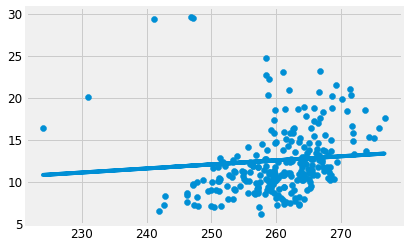

In [92]:
#Fitted line plot
%matplotlib inline
plot_fitted_line(X,y,predictions)

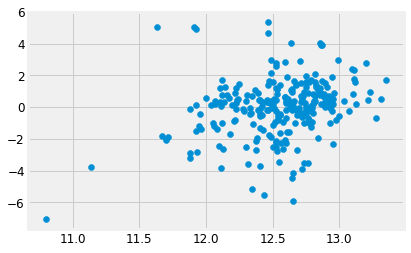

In [93]:
#Residual plot
%matplotlib inline
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


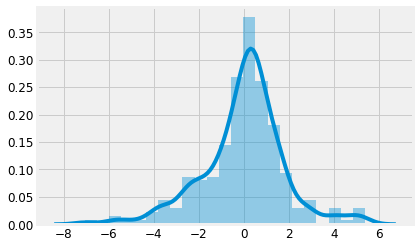

In [94]:
#Residual histogram
sns.distplot(model.resid)

### Extend regression model to include Reading score

<IPython.core.display.Javascript object>


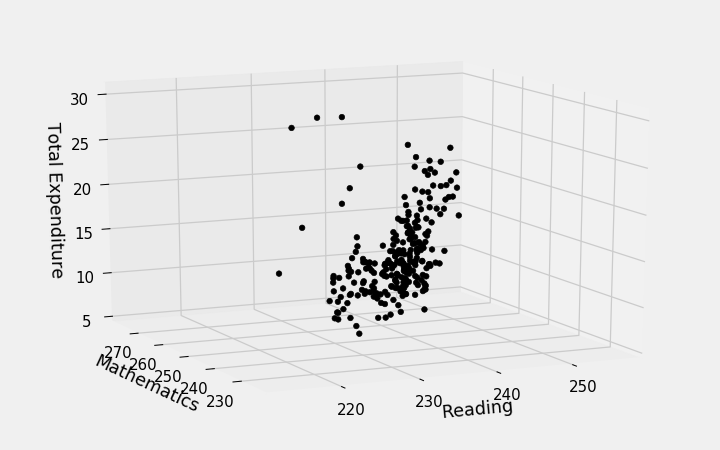

Text(0.5,0,'Total Expenditure')

In [96]:
#3D plot of inputs vs output

# create matplotlib 3d axes

%matplotlib notebook
fig = plt.figure(figsize=(8, 5))
ax = Axes3D(fig, azim=-115, elev=15)

# plot data points

ax.scatter(funding_placement_naep.Reading, funding_placement_naep.Mathematics, funding_placement_naep['TOTAL_EXPENDITURE'], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Reading')
ax.set_ylabel('Mathematics')
ax.set_zlabel('Total Expenditure')

In [97]:
cols_model = ['Reading',
              'Mathematics']

X = funding_placement_naep[cols_model]


y = funding_placement_naep["TOTAL_EXPENDITURE"] #juvenile placement rate
groups = funding_placement_naep["STATE"]
# Note the difference in argument order
model = sm.MixedLM(y, X, groups).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:            MixedLM Dependent Variable: TOTAL_EXPENDITURE
No. Observations: 255     Method:             REML             
No. Groups:       51      Scale:              3.4322           
Min. group size:  5       Likelihood:         -602.8620        
Max. group size:  5       Converged:          Yes              
Mean group size:  5.0                                          
----------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------------
Reading          -0.358     0.061  -5.870  0.000  -0.477  -0.238
Mathematics       0.381     0.057   6.720  0.000   0.270   0.492
Group Var        13.727     1.760                               
===============================================================

"""

In [98]:
RMSE(y,predictions)

4.104135474470423

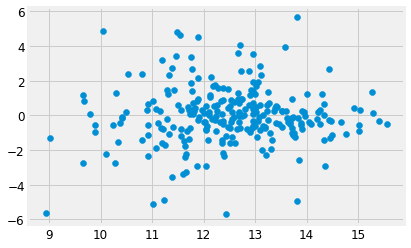

In [99]:
#Residual plot
%matplotlib inline
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


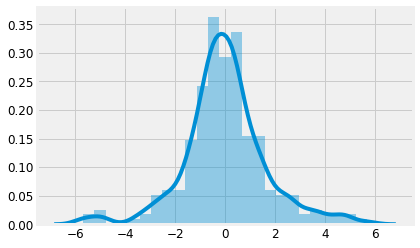

In [100]:
#Residual histogram
sns.distplot(model.resid)

<IPython.core.display.Javascript object>


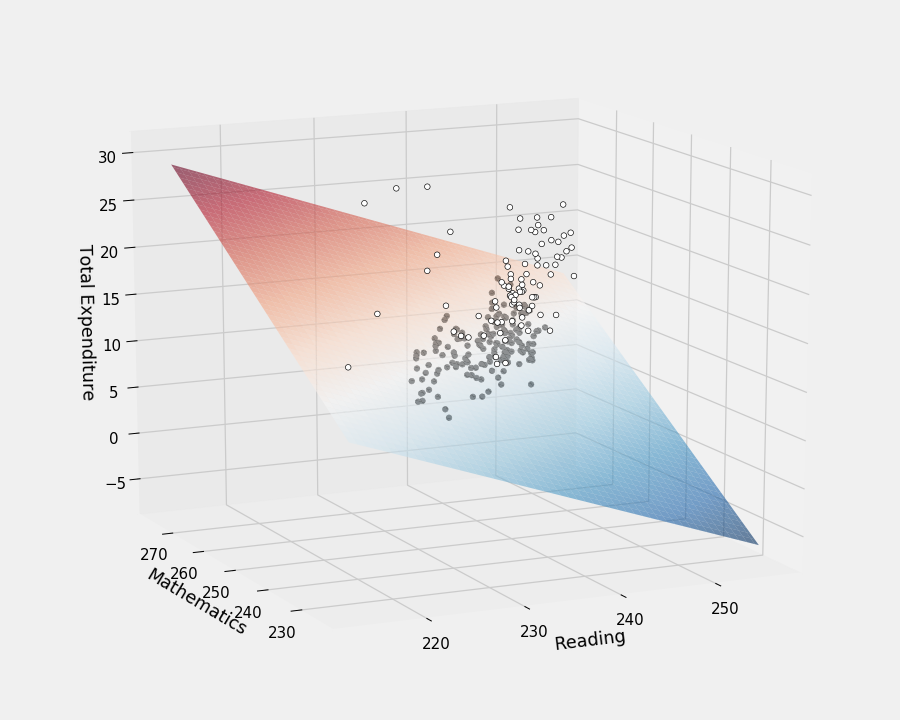

Text(0.5,0,'Total Expenditure')

In [101]:
## Create the 3d plot
# grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.Reading.min(), X.Reading.max(), 100), 
                       np.linspace(X.Mathematics.min(), X.Mathematics.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = model.params[0] * xx1 + model.params[1] * xx2

# create matplotlib 3d axes
%matplotlib notebook
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - predictions
ax.scatter(X[resid >= 0].Reading, X[resid >= 0].Mathematics, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Reading, X[resid < 0].Mathematics, y[resid < 0], color='black', alpha=1.0)

# set axis labels

ax.set_xlabel('Reading')
ax.set_ylabel('Mathematics')
ax.set_zlabel('Total Expenditure')

## Total Revenue

### Consider a model using only Mathematics score as an input

In [80]:
cols_model = ['Mathematics']

X = funding_placement_naep[cols_model]
y = funding_placement_naep["TOTAL_REVENUE"] 
groups = funding_placement_naep["STATE"]
# Note the difference in argument order
model = sm.MixedLM(y, X, groups).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: TOTAL_REVENUE
No. Observations: 255     Method:             REML         
No. Groups:       51      Scale:              4.4185       
Min. group size:  5       Likelihood:         -624.8210    
Max. group size:  5       Converged:          Yes          
Mean group size:  5.0                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Mathematics   0.048     0.002  24.697  0.000   0.044   0.052
Group Var    12.202     1.395                               
===========================================================

"""

In [81]:
RMSE(y,predictions)

4.045453234352425

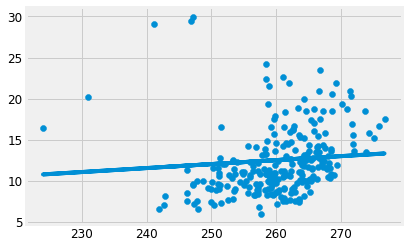

In [82]:
#Fitted line plot
%matplotlib inline
plot_fitted_line(X,y,predictions)

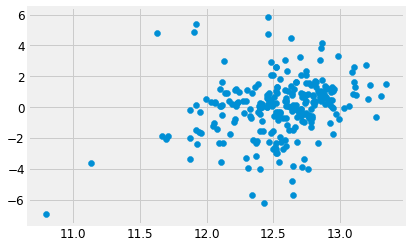

In [83]:
#Residual plot
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


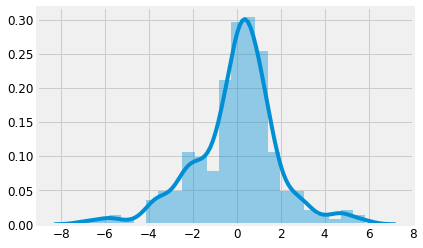

In [84]:
#Residual histogram
sns.distplot(model.resid)

### Extend regression model to include Reading score

<IPython.core.display.Javascript object>


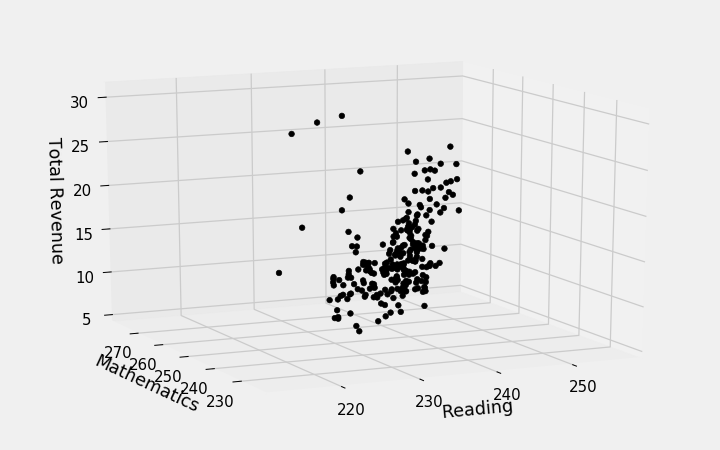

Text(0.5,0,'Total Revenue')

In [102]:
#3D plot of inputs vs output

# create matplotlib 3d axes

%matplotlib notebook
fig = plt.figure(figsize=(8, 5))
ax = Axes3D(fig, azim=-115, elev=15)

# plot data points

ax.scatter(funding_placement_naep.Reading, funding_placement_naep.Mathematics, funding_placement_naep['TOTAL_REVENUE'], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Reading')
ax.set_ylabel('Mathematics')
ax.set_zlabel('Total Revenue')


In [103]:
cols_model = ['Reading',
              'Mathematics']

X = funding_placement_naep[cols_model]
y = funding_placement_naep["TOTAL_REVENUE"] 
groups = funding_placement_naep["STATE"]
# Note the difference in argument order
model = sm.MixedLM(y, X, groups).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: TOTAL_REVENUE
No. Observations: 255     Method:             REML         
No. Groups:       51      Scale:              3.7762       
Min. group size:  5       Likelihood:         -612.9125    
Max. group size:  5       Converged:          Yes          
Mean group size:  5.0                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Reading      -0.348     0.064  -5.453  0.000  -0.473  -0.223
Mathematics   0.372     0.059   6.265  0.000   0.255   0.488
Group Var    13.864     1.703                               
===========================================================

"""

In [104]:
RMSE(y,predictions)

4.16141302103466

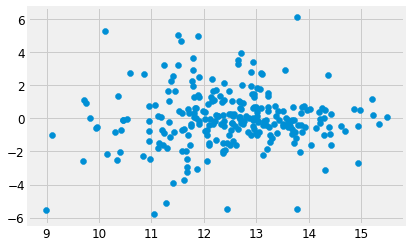

In [105]:
#Residual plot
%matplotlib inline
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


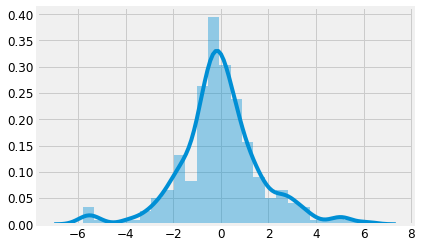

In [106]:
#Residual histogram
sns.distplot(model.resid)

<IPython.core.display.Javascript object>


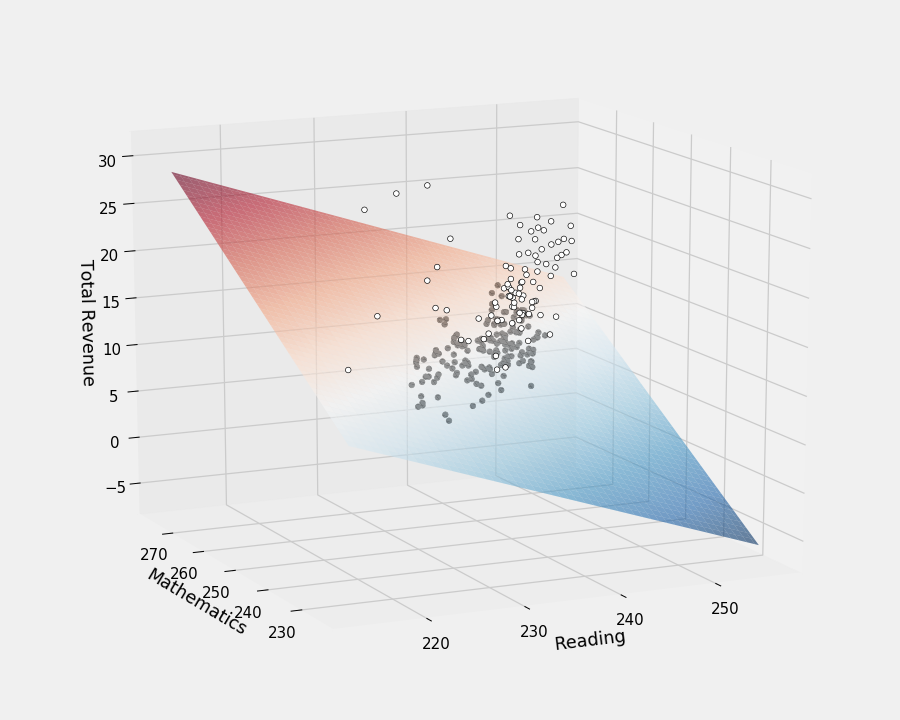

Text(0.5,0,'Total Revenue')

In [107]:
## Create the 3d plot
# grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.Reading.min(), X.Reading.max(), 100), 
                       np.linspace(X.Mathematics.min(), X.Mathematics.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = model.params[0] * xx1 + model.params[1] * xx2

# create matplotlib 3d axes
%matplotlib notebook
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - predictions
ax.scatter(X[resid >= 0].Reading, X[resid >= 0].Mathematics, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Reading, X[resid < 0].Mathematics, y[resid < 0], color='black', alpha=1.0)

# set axis labels

ax.set_xlabel('Reading')
ax.set_ylabel('Mathematics')
ax.set_zlabel('Total Revenue')


# Linear Models

## Total Expenditure

### Consider a model using only Mathematics score as an input

In [108]:

#OLS linear model without a constant but with a transformation

cols_model = [
             'Mathematics']

X = funding_placement_naep[cols_model]


y = np.log(funding_placement_naep["TOTAL_EXPENDITURE"]) 

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TOTAL_EXPENDITURE   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.934e+04
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          1.05e-241
Time:                        11:47:58   Log-Likelihood:                -39.762
No. Observations:                 255   AIC:                             81.52
Df Residuals:                     254   BIC:                             85.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Mathematics     0.0095   6.82e-05    139.062      0.000       0.009       0.010
==============================================================================
Omnibus:                       41.158   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.768
Skew:                           0.930   Prob(JB):                     8.62e-15
Kurtosis:                       4.623   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
RMSE(y,predictions)

0.2828018520555505

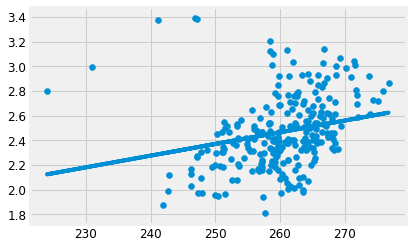

In [110]:
#Fitted line plot
%matplotlib inline
plot_fitted_line(X,y,predictions)

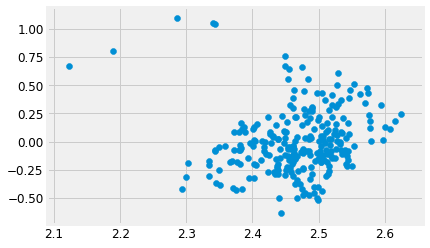

In [111]:
#Residual plot
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


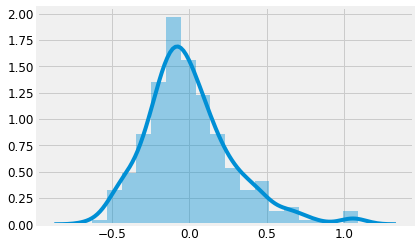

In [112]:
#Residual histogram
sns.distplot(model.resid)

### Extend regression model to include Reading score

In [113]:
#OLS linear model without a constant

cols_model = ['Reading',
             'Mathematics']

X = funding_placement_naep[cols_model]


y = np.log(funding_placement_naep["TOTAL_EXPENDITURE"]) 

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TOTAL_EXPENDITURE   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     9632.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          1.80e-239
Time:                        11:48:12   Log-Likelihood:                -39.744
No. Observations:                 255   AIC:                             83.49
Df Residuals:                     253   BIC:                             90.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Reading        -0.0011      0.006     -0.191      0.849      -0.013       0.010
Mathematics     0.0105      0.005      1.924      0.055      -0.000       0.021
==============================================================================
Omnibus:                       41.358   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.942
Skew:                           0.936   Prob(JB):                     7.91e-15
Kurtosis:                       4.616   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-values for each predictor indicate that neither variable is a significant predictor in the case of a multiple linear regression model.

## Total Revenue

### Consider a model using only Mathematics score as an input

In [114]:

#OLS linear model without a constant but with a transformation

cols_model = [
             'Mathematics']

X = funding_placement_naep[cols_model]


y = np.log(funding_placement_naep["TOTAL_REVENUE"])

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TOTAL_REVENUE   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          1.86e-239
Time:                        11:48:18   Log-Likelihood:                -44.899
No. Observations:                 255   AIC:                             91.80
Df Residuals:                     254   BIC:                             95.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Mathematics     0.0095   6.96e-05    136.218      0.000       0.009       0.010
==============================================================================
Omnibus:                       36.426   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.038
Skew:                           0.886   Prob(JB):                     5.01e-12
Kurtosis:                       4.325   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
RMSE(y,predictions)

0.288556572024691

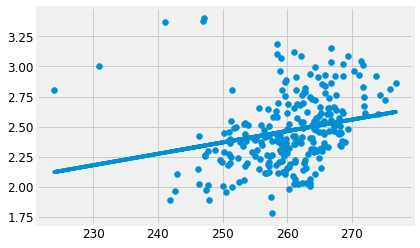

In [116]:
#Fitted line plot
%matplotlib inline
plot_fitted_line(X,y,predictions)

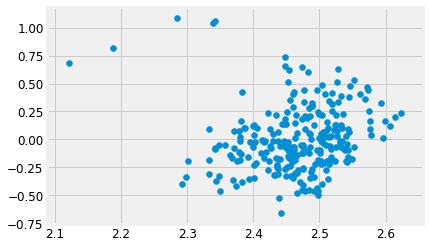

In [117]:
#Residual plot
plt.scatter(predictions, model.resid)
plt.show()

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


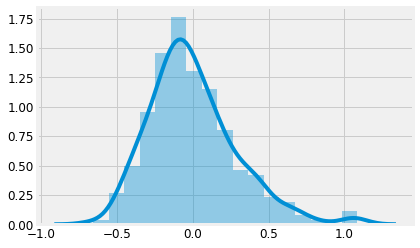

In [118]:
#Residual histogram
sns.distplot(model.resid)

### Extend regression model to include Reading score

In [119]:
#OLS linear model without a constant

cols_model = ['Reading',
             'Mathematics']

X = funding_placement_naep[cols_model]


y = np.log(funding_placement_naep["TOTAL_REVENUE"])

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TOTAL_REVENUE   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     9242.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          3.15e-237
Time:                        11:48:29   Log-Likelihood:                -44.889
No. Observations:                 255   AIC:                             93.78
Df Residuals:                     253   BIC:                             100.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Reading        -0.0009      0.006     -0.143      0.887      -0.013       0.011
Mathematics     0.0103      0.006      1.841      0.067      -0.001       0.021
==============================================================================
Omnibus:                       36.625   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.292
Skew:                           0.891   Prob(JB):                     4.42e-12
Kurtosis:                       4.321   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-values for each predictor indicate that neither variable is a significant predictor in the case of a multiple linear regression model.